# 타이타닉
데이터
--

훈련 데이터https://bit.ly/2WflH16
 테스트 데이터  https://bit.ly/2ZS7hGc


## 속성 데이터

- Survival - 생존여부: 0 = No, 1 = Yes
- Pclass - 티켓 등급: 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex - 성별: male, female
- Age - 나이
- SibSp - 동승한 형제, 배우자 수
- Parch - 부모와 자녀의 수
- Ticket - 티켓 번호
- Fare - 승선 요금
- Cabin - 캐빈(객실) 번호
- Embarked - 승선한 항구: C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
!curl -L https://bit.ly/2WflH16 -o titanic_train.csv
!curl -L https://bit.ly/2ZS7hGc -o titanic_test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   146  100   146    0     0    456      0 --:--:-- --:--:-- --:--:--   456
100   142    0   142    0     0    281      0 --:--:-- --:--:-- --:--:--   281
100   318  100   318    0     0    416      0 --:--:-- --:--:-- --:--:--     0
100 61194  100 61194    0     0  53491      0  0:00:01  0:00:01 --:--:-- 53491
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   145  100   145    0     0   2788      0 --:--:-- --:--:-- --:--:--  2788
100   141    0   141    0     0    705      0 --:--:-- --:--:-- --:--:--   705
100   318  100   318    0     0    721      0 --:--:-- --:--:-- --:--:--     0
100 28629  100 28629    0     0  45587      0 --:--:-- --:--:-- --:--:-- 45587


In [2]:
!ls -l

total 92
drwxr-xr-x 1 root root  4096 Nov  1 13:35 sample_data
-rw-r--r-- 1 root root 28629 Nov  9 01:48 titanic_test.csv
-rw-r--r-- 1 root root 61194 Nov  9 01:48 titanic_train.csv


In [3]:
import pandas as pd

train = pd.read_csv("./titanic_train.csv", index_col=["PassengerId"])
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test = pd.read_csv("./titanic_test.csv", index_col=["PassengerId"])

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# 성별을 구분하는 컬럼을 추가해본다

train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

In [8]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [9]:
print(train.shape)
train[["Sex", "Sex_encode"]].head()

(891, 12)


,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [10]:
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1
        
print(test.shape)
test[["Sex", "Sex_encode"]].head()

(418, 11)


,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         714 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Cabin       204 non-null    object 
 10  Embarked    889 non-null    object 
 11  Sex_encode  891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 90.5+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Name        418 non-null    object 
 2   Sex         418 non-null    object 
 3   Age         332 non-null    float64
 4   SibSp       418 non-null    int64  
 5   Parch       418 non-null    int64  
 6   Ticket      418 non-null    object 
 7   Fare        417 non-null    float64
 8   Cabin       91 non-null     object 
 9   Embarked    418 non-null    object 
 10  Sex_encode  418 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 39.2+ KB


## 요금이 비어 있는 항목을 찾아본다

In [13]:
train.isna().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Sex_encode      0
dtype: int64

In [14]:
test.isna().sum()

Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin         327
Embarked        0
Sex_encode      0
dtype: int64

In [15]:
test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [16]:
# 비어 있는 요금 항목을, 요금의 평균치로 대체한다
mean_fare = train["Fare"].mean()
print("Fare(Mean) = ${0:.3f}".format(mean_fare))

Fare(Mean) = $32.204


In [17]:
test.loc[pd.isnull(test["Fare"]), "Fare"] = mean_fare

test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,


### Encode Embarked

In [18]:
train.shape

(891, 12)

In [19]:
train["Embarked"].head()   # C = Cherbourg, Q = Queenstown, S = Southampton

PassengerId
1    S
2    C
3    S
4    S
5    S
Name: Embarked, dtype: object

In [20]:
train_embarked = pd.get_dummies(train["Embarked"], prefix="Embarked")

print(train_embarked.shape)
train_embarked.head()

(891, 3)


,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [21]:
test_embarked = pd.get_dummies(test["Embarked"], prefix="Embarked")

print(test_embarked.shape)
test_embarked.head()

(418, 3)


,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
892,0,1,0
893,0,0,1
894,0,1,0
895,0,0,1
896,0,0,1


In [22]:
train = pd.concat([train, train_embarked], axis=1)

print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(891, 15)


,Embarked,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
1,S,0,0,1
2,C,1,0,0
3,S,0,0,1
4,S,0,0,1
5,S,0,0,1


In [23]:
test = pd.concat([test, test_embarked], axis=1)

print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(418, 14)


,Embarked,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
892,Q,0,1,0
893,S,0,0,1
894,Q,0,1,0
895,S,0,0,1
896,S,0,0,1


## Train

In [24]:
feature_names = ["Pclass", "Sex_encode", "Fare",
                 "Embarked_C", "Embarked_Q", "Embarked_S"]

X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 6)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,
1,3,0.0,7.2500,0,0,1
2,1,1.0,71.2833,1,0,0
3,3,1.0,7.9250,0,0,1
4,1,1.0,53.1000,0,0,1
5,3,0.0,8.0500,0,0,1


In [25]:
y_train = train["Survived"]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)

In [27]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

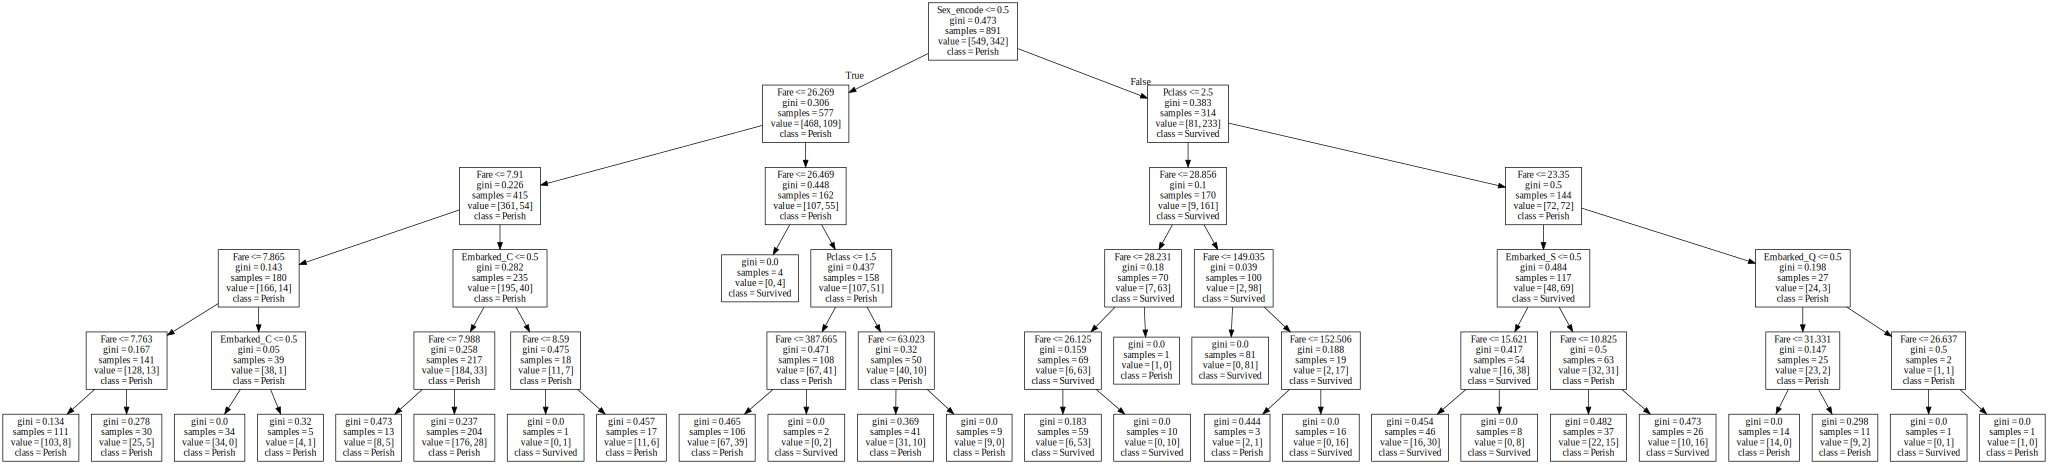

In [28]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                feature_names=feature_names,
                class_names=["Perish", "Survived"],
                out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

## Predict

In [29]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(418, 6)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,
892,3,0.0,7.8292,0,1,0
893,3,1.0,7.0000,0,0,1
894,2,0.0,9.6875,0,1,0
895,3,0.0,8.6625,0,0,1
896,3,1.0,12.2875,0,0,1


In [30]:
prediction = model.predict(X_test)

X_test["survived"] = prediction
X_test[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S,survived
PassengerId,,,,,,,
892,3,0.0,7.8292,0,1,0,0
893,3,1.0,7.0000,0,0,1,0
894,2,0.0,9.6875,0,1,0,0
895,3,0.0,8.6625,0,0,1,0
896,3,1.0,12.2875,0,0,1,1
897,3,0.0,9.2250,0,0,1,0
898,3,1.0,7.6292,0,1,0,1
899,2,0.0,29.0000,0,0,1,0
900,3,1.0,7.2292,1,0,0,1


## 아래는 캐클 사이트에 답안을 제출하는 과정이며 참고로 보기 바란다.
- 제출 양식을 따로 다운로드 받아야 한다.


제출 양식 https://bit.ly/2KvK3k4

## Submit

In [31]:
!curl -L https://bit.ly/2KvK3k4 -o titanic_gender_submission.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   158  100   158    0     0   2164      0 --:--:-- --:--:-- --:--:--  2164
100   154    0   154    0     0    633      0 --:--:-- --:--:-- --:--:--  1555
100   318  100   318    0     0    610      0 --:--:-- --:--:-- --:--:--   610
100  3258  100  3258    0     0   4037      0 --:--:-- --:--:-- --:--:--  4037


In [32]:
# !dir

In [33]:
import numpy as np
submission = pd.read_csv("./titanic_gender_submission.csv", index_col="PassengerId")

In [34]:
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [35]:
submission["Survived"] = prediction.astype(np.int32)

print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [36]:
submission.to_csv("baseline-script.csv")

In [37]:
# !dir

In [38]:
from google.colab import files
files.download("baseline-script.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Three ways to load CSV files into Colab
##### (1) From Github (Files < 25MB)
- The easiest way to upload a CSV file is from your GitHub repository. 
  Click on the dataset in your repository, then click on View Raw. Copy the 
  link to the raw dataset and store it as a string variable called url in 
  Colab as shown below (a cleaner method but it’s not necessary). 
- The last step is to load the url into Pandas read_csv to get the dataframe.
  url = 'copied_raw_GH_link'
  df1 = pd.read_csv(url)
- Dataset is now stored in a Pandas Dataframe

##### (2) From a local drive
- To upload from your local drive, start with the following code:
  from google.colab import files
  uploaded = files.upload()
- It will prompt you to select a file. Click on “Choose Files” then select 
  and upload the file. Wait for the file to be 100% uploaded. You should see 
  the name of the file once Colab has uploaded it.
- Finally, type in the following code to import it into a dataframe (make 
  sure the filename matches the name of the uploaded file).
  import io
  df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))
- Dataset is now stored in a Pandas Dataframe

##### (3) From Google Drive via PyDrive
- This is the most complicated of the three methods. I’ll show it for those 
  that have uploaded CSV files into their Google Drive for workflow control. 
- First, type in the following code:
  < Code to read csv file into Colaboratory:>
  !pip install -U -q PyDrive
  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials
  < Authenticate and create the PyDrive client.>
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
- When prompted, click on the link to get authentication to allow Google to 
  access your Drive. You should see a screen with “Google Cloud SDK wants 
  to access your Google Account” at the top. After you allow permission, 
  copy the given verification code and paste it in the box in Colab.